In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path
import os
import statsmodels.api as sm

from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import OLSInfluence, variance_inflation_factor
from scipy import stats

In [2]:
# Check and change the current working directory - A.F.
print(os.getcwd())
os.chdir(Path().resolve())
# read in data set with first column (district name) set to index
df = pd.read_excel("../Data/cleaned_data_encoded.xlsx", index_col =0)

c:\Users\Amanda\Documents\Capstone\DSE6311OM_Group3-1\Notebook


## OLS Model - A.F.

In [3]:
# drop columns for features not to be used in model
df = df.drop(columns = ['still_in_school_pct', 
                        'dropout_rate_pct', 
                        "overall_classification_Not requiring assistance or intervention",
                        "overall_classification_Requiring assistance or intervention",
                        "reason_for_classification_In need of broad/comprehensive support",
                        "reason_for_classification_In need of focused/targeted support",
                        "reason_for_classification_Limited or no progress toward targets",
                        "reason_for_classification_Meeting or exceeding targets",
                        "reason_for_classification_Moderate progress toward targets",
                        "reason_for_classification_Substantial progress toward targets"])

df.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures,in_district_expenditures_per_pupil,graduation_rate_pct,non_grad_completers_pct,hs_equivalency_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,,,,
Abington,11.0,17.8,39,3.560342e+07,16609.95,88.9,0.7,0.0,13.9,81.3,37848.0,17.387952,40.85
Acton-Boxborough,6.2,15.5,85,1.005648e+08,19407.68,96.1,0.2,0.0,13.0,88.3,69189.5,18.426312,20.10
Agawam,6.2,18.3,46,7.195848e+07,20414.91,88.0,1.9,0.4,12.5,89.4,31126.0,18.091600,46.05
Amesbury,2.7,23.7,47,3.996617e+07,22338.70,88.3,0.8,0.8,10.6,89.0,41139.0,17.503544,40.10
Amherst-Pelham,7.3,24.2,33,3.248902e+07,26177.60,90.9,0.9,0.9,10.2,81.3,34325.0,17.296413,36.90


In [4]:
# drop 'in_district_expenditures' and use 'log_in_district_expenditures' instead
df = df.drop(columns = ['in_district_expenditures'])
df.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,graduation_rate_pct,non_grad_completers_pct,hs_equivalency_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,log_in_district_expenditures,needs_income_avg_pct
district_name,,,,,,,,,,,,
Abington,11.0,17.8,39,16609.95,88.9,0.7,0.0,13.9,81.3,37848.0,17.387952,40.85
Acton-Boxborough,6.2,15.5,85,19407.68,96.1,0.2,0.0,13.0,88.3,69189.5,18.426312,20.10
Agawam,6.2,18.3,46,20414.91,88.0,1.9,0.4,12.5,89.4,31126.0,18.091600,46.05
Amesbury,2.7,23.7,47,22338.70,88.3,0.8,0.8,10.6,89.0,41139.0,17.503544,40.10
Amherst-Pelham,7.3,24.2,33,26177.60,90.9,0.9,0.9,10.2,81.3,34325.0,17.296413,36.90


In [5]:
# split into test and training sets
# test train split from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['graduation_rate_pct'])
y = df['graduation_rate_pct']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (178, 11)
X_test shape: (45, 11)
y_train shape: (178,)
y_test shape: (45,)


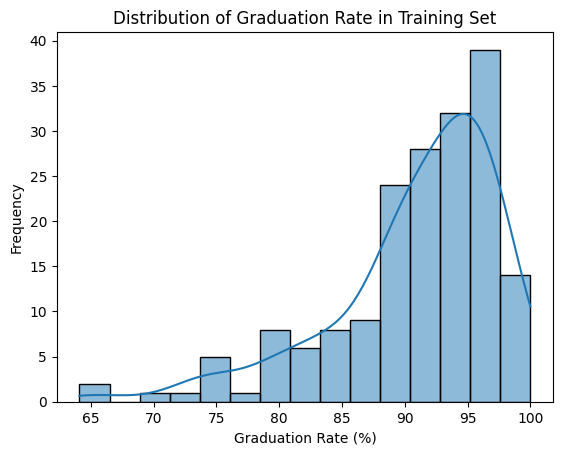

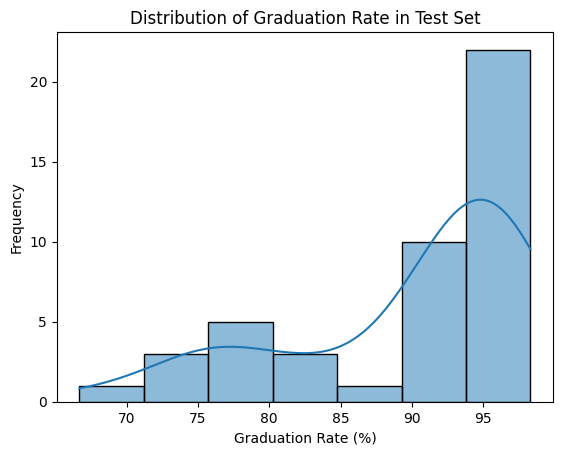

In [6]:
#check the training and test set distributions

# Plot the distribution of the target variable
sns.histplot(y_train, kde=True)
plt.title("Distribution of Graduation Rate in Training Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()
# Plot the distribution of the target variable in the test set
sns.histplot(y_test, kde=True)
plt.title("Distribution of Graduation Rate in Test Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# scale the features

# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


In [8]:
# create OLS
X_train_scaled_const = sm.add_constant(X_train_scaled) #adds a constant term to the predictor
ols_model = sm.OLS(y_train, X_train_scaled_const).fit()


# Print the summary of the OLS model
results = ols_model.summary()
print(results)

                             OLS Regression Results                            
Dep. Variable:     graduation_rate_pct   R-squared:                       0.763
Model:                             OLS   Adj. R-squared:                  0.748
Method:                  Least Squares   F-statistic:                     48.70
Date:                 Sun, 17 Aug 2025   Prob (F-statistic):           3.14e-46
Time:                         12:03:24   Log-Likelihood:                -463.01
No. Observations:                  178   AIC:                             950.0
Df Residuals:                      166   BIC:                             988.2
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

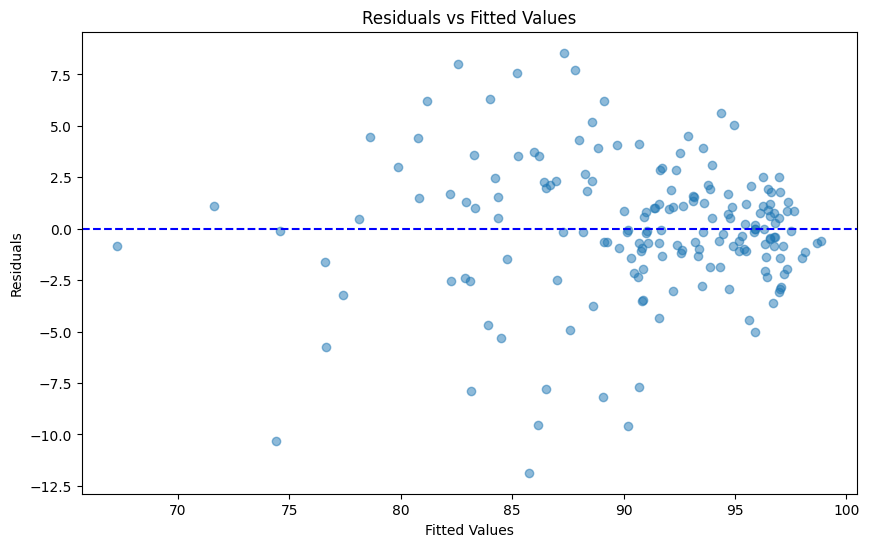

In [25]:
# check linearity based on residuals
# Calculate residuals
fitted_values = ols_model.fittedvalues
residuals = y_train - fitted_values

# standardized residuals, leverage, and Cook's distance
influence = OLSInfluence(ols_model)
stud_resid = influence.resid_studentized_external
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='blue', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

<Figure size 1000x600 with 0 Axes>

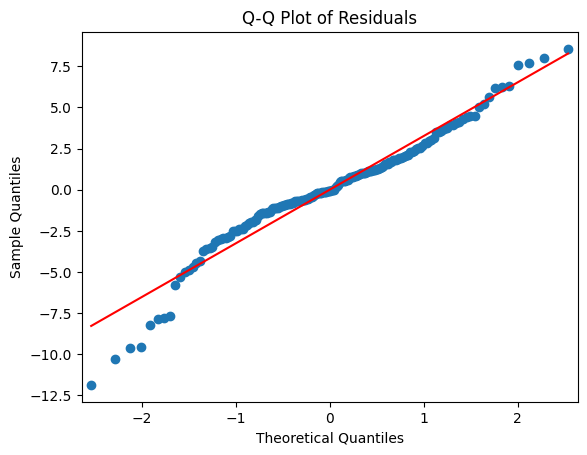

In [26]:
# check normality of residuals
# Q-Q plot for residuals
plt.figure(figsize=(10, 6))
qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [27]:
# check homoscedasticity
# Breusch-Pagan test for homoscedasticity
bp_test = het_breuschpagan(residuals, X_train_scaled_const)
print(f"Breusch-Pagan: LM={bp_test[0]:.3f}, p={bp_test[1]:.4f} | F={bp_test[2]:.3f}, p={bp_test[3]:.4f}")

# White test for homoscedasticity
white_test = het_white(residuals, X_train_scaled_const)
print(f"White test:     LM={white_test[0]:.3f}, p={white_test[1]:.4f} | F={white_test[2]:.3f}, p={white_test[3]:.4f}")


Breusch-Pagan: LM=36.727, p=0.0001 | F=3.923, p=0.0000
White test:     LM=110.142, p=0.0079 | F=2.108, p=0.0002


In [28]:
# check independence
# Durbin-Watson test for independence of residuals
dw_statistic = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_statistic:.3f}")

Durbin-Watson statistic: 1.925


In [29]:
# check for multicollinearity

if hasattr(X_train_scaled_const, 'columns'):
    feature_names = list(X_train_scaled_const.columns)
else:
    feature_names = [f"x{i} for i in range(x_train_scaled_const.shape[1])]"]

X_vif = pd.DataFrame(ols_model.model.exog, columns=feature_names)

vif_df = pd.DataFrame({
    "feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
})

print("\nVIFs:")
print(vif_df.sort_values(by="VIF", ascending=False))


VIFs:
                                    feature       VIF
11                     needs_income_avg_pct  5.005998
1                      english_learners_pct  3.961176
4        in_district_expenditures_per_pupil  2.655401
7                     student_teacher_ratio  2.569548
9                     DOR_income_per_capita  2.550181
8                  experienced_teachers_pct  2.177079
10             log_in_district_expenditures  2.133487
3   progress_toward_improvement_targets_pct  2.071353
5                   non_grad_completers_pct  1.790363
2            students_with_disabilities_pct  1.576014
6                        hs_equivalency_pct  1.101457
0                                     const  1.000000


In [35]:
# influential and leverage points
n = X_vif.shape[0]
p = X_vif.shape[1]

influence_df = pd.DataFrame({
    "fitted_values": fitted_values,
    "residuals": residuals,
    "leverage": OLSInfluence(ols_model).hat_matrix_diag,
    "cooks_d": cooks_d,
})

# simple rule of thumb for leverage points
high_leverage_threshold = 2 * (p / n)
cooks_d_threshold = 4 / n
print(f"\nHigh leverage threshold: {high_leverage_threshold:.3f}")
print(f"\nCook's distance threshold: {cooks_d_threshold:.3f}")
print("Top 20 by Cook's distance:")
print(influence_df.sort_values("cooks_d", ascending=False).head(20))


High leverage threshold: 0.135

Cook's distance threshold: 0.022
Top 20 by Cook's distance:
                    fitted_values  residuals  leverage   cooks_d
district_name                                                   
Chelsea                 74.398311 -10.298311  0.169181  0.189887
Greenfield              85.759251 -11.859251  0.075775  0.091140
Ware                    86.152051  -9.552051  0.082685  0.065495
Milford                 83.165556  -7.865556  0.113775  0.065470
Nantucket               87.344645   8.555355  0.089841  0.057988
Ralph C Mahar           86.510849  -7.810849  0.101508  0.056039
Avon                    87.806826   7.693174  0.097363  0.051666
Webster                 76.658657  -5.758657  0.128206  0.040865
Monson                  79.884994   3.015006  0.297795  0.040104
Uxbridge                90.191161  -9.591161  0.048978  0.036391
Springfield             78.616909   4.483091  0.147370  0.029762
Quabbin                 90.680178  -7.680178  0.060313  0.0294

In [36]:
high_leverage_threshold = 2 * (p / n)
cooks_d_threshold = 4 / n
print(f"\nHigh leverage threshold: {high_leverage_threshold:.3f}")
print(f"\nCook's distance threshold: {cooks_d_threshold:.3f}")
print("Top 20 by leverage:")
print(influence_df.sort_values("leverage", ascending=False).head(20))


High leverage threshold: 0.135

Cook's distance threshold: 0.022
Top 20 by leverage:
                      fitted_values  residuals  leverage   cooks_d
district_name                                                     
Weston                    95.340229  -0.340229  0.519017  0.001897
Southern Berkshire        88.363502   1.836498  0.330251  0.018139
Monson                    79.884994   3.015006  0.297795  0.040104
Southbridge               67.249846  -0.849846  0.266670  0.002616
Falmouth                  89.124549  -0.624549  0.237562  0.001164
Boston                    82.884588  -2.384588  0.198751  0.012860
Dover-Sherborn            96.961390   0.538610  0.185642  0.000593
Martha's Vineyard         86.679354   2.120646  0.181646  0.008911
Framingham                76.603653  -1.603653  0.179440  0.005007
Blackstone-Millville      86.956703   2.343297  0.173775  0.010211
Cambridge                 90.936932   0.563068  0.170411  0.000573
Chelsea                   74.398311 -10.298

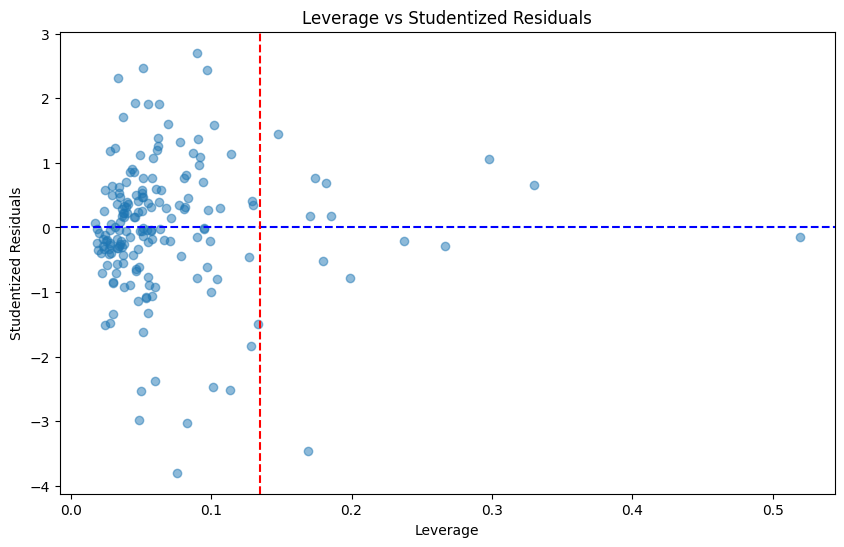

In [37]:
# leverage vs studentized residuals (influence plot)
plt.figure(figsize=(10, 6))
plt.scatter(leverage, stud_resid, alpha=0.5)
plt.axhline(0, color='blue', linestyle='--')
plt.axvline(high_leverage_threshold, color='red', linestyle='--')
plt.xlabel("Leverage")
plt.ylabel("Studentized Residuals")
plt.title("Leverage vs Studentized Residuals")
plt.show()

## Re-run OLS Model after log transformation of response variable, graduation_rate_pct. - A.F.

In [38]:
df["log_graduation_rate_pct"] = np.log(df['graduation_rate_pct'])
df = df.drop(columns = ['graduation_rate_pct'])
df.head()

,english_learners_pct,students_with_disabilities_pct,progress_toward_improvement_targets_pct,in_district_expenditures_per_pupil,non_grad_completers_pct,hs_equivalency_pct,student_teacher_ratio,experienced_teachers_pct,DOR_income_per_capita,log_in_district_expenditures,needs_income_avg_pct,log_graduation_rate_pct
district_name,,,,,,,,,,,,
Abington,11.0,17.8,39,16609.95,0.7,0.0,13.9,81.3,37848.0,17.387952,40.85,4.487512
Acton-Boxborough,6.2,15.5,85,19407.68,0.2,0.0,13.0,88.3,69189.5,18.426312,20.10,4.565389
Agawam,6.2,18.3,46,20414.91,1.9,0.4,12.5,89.4,31126.0,18.091600,46.05,4.477337
Amesbury,2.7,23.7,47,22338.70,0.8,0.8,10.6,89.0,41139.0,17.503544,40.10,4.480740
Amherst-Pelham,7.3,24.2,33,26177.60,0.9,0.9,10.2,81.3,34325.0,17.296413,36.90,4.509760


In [40]:
# split into test and training sets
# test train split from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop(columns=['log_graduation_rate_pct'])
y = df['log_graduation_rate_pct']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (178, 11)
X_test shape: (45, 11)
y_train shape: (178,)
y_test shape: (45,)


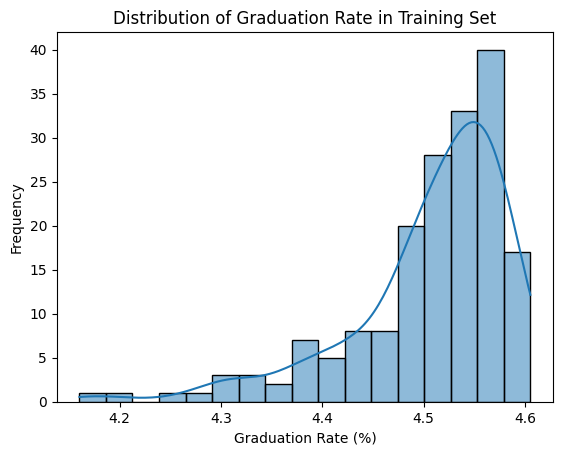

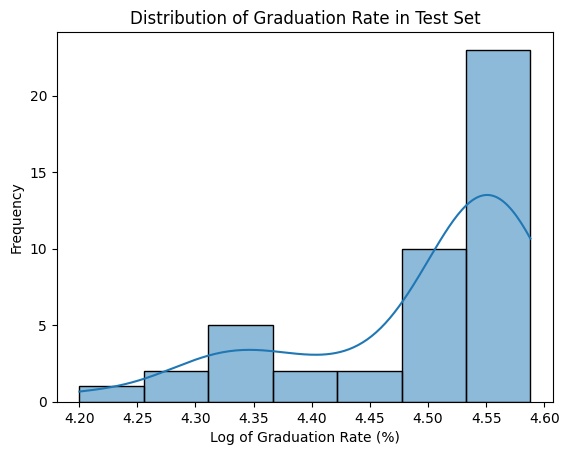

In [46]:
#check the training and test set distributions

# Plot the distribution of the target variable
sns.histplot(y_train, kde=True)
plt.title("Distribution of Graduation Rate in Training Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()
# Plot the distribution of the target variable in the test set
sns.histplot(y_test, kde=True)
plt.title("Distribution of Graduation Rate in Test Set")
plt.xlabel("Log of Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()

In [42]:
# scale the features

# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [43]:
# create OLS
X_train_scaled_const = sm.add_constant(X_train_scaled) #adds a constant term to the predictor
ols_model = sm.OLS(y_train, X_train_scaled_const).fit()


# Print the summary of the OLS model
results = ols_model.summary()
print(results)

                               OLS Regression Results                              
Dep. Variable:     log_graduation_rate_pct   R-squared:                       0.758
Model:                                 OLS   Adj. R-squared:                  0.742
Method:                      Least Squares   F-statistic:                     47.28
Date:                     Sun, 17 Aug 2025   Prob (F-statistic):           1.99e-45
Time:                             12:52:55   Log-Likelihood:                 326.46
No. Observations:                      178   AIC:                            -628.9
Df Residuals:                          166   BIC:                            -590.7
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

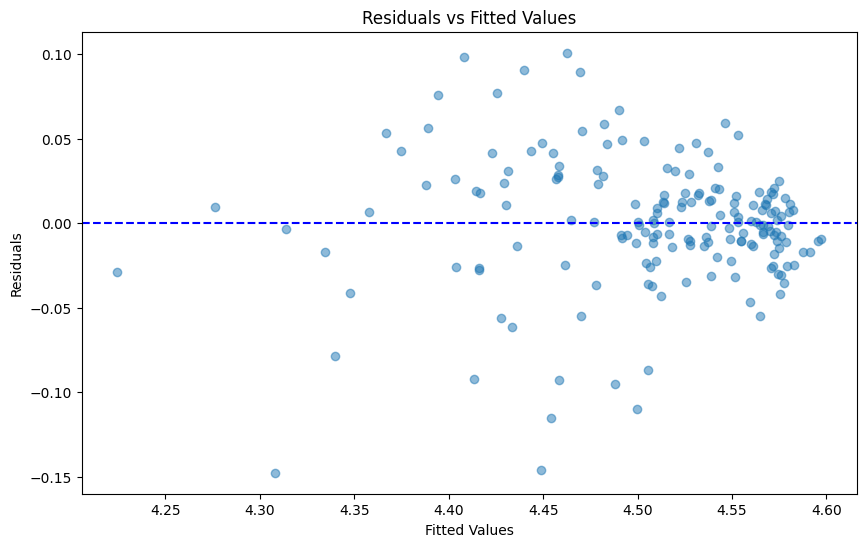

In [44]:
# check linearity based on residuals
# Calculate residuals
fitted_values = ols_model.fittedvalues
residuals = y_train - fitted_values

# standardized residuals, leverage, and Cook's distance
influence = OLSInfluence(ols_model)
stud_resid = influence.resid_studentized_external
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='blue', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

<Figure size 1000x600 with 0 Axes>

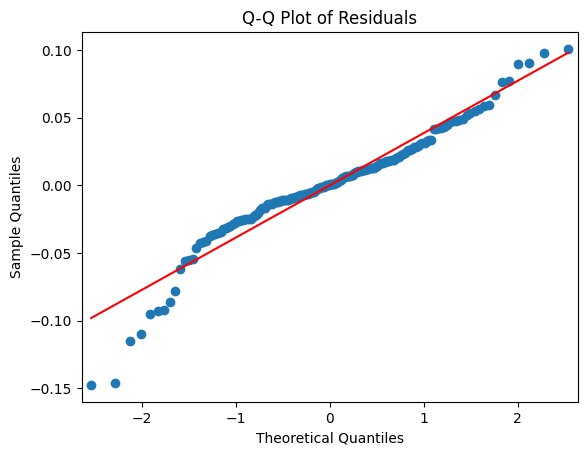

In [45]:
# check normality of residuals
# Q-Q plot for residuals
plt.figure(figsize=(10, 6))
qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()